In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree  import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression  ,Ridge ,SGDRegressor
from sklearn.ensemble import RandomForestRegressor

# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import radians, sin, cos, asin, sqrt


In [2]:
#Loading the Data
Fare = pd.read_csv("uber.csv", index_col=0)

# Understanding the data

In [3]:
Fare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
Fare.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [5]:
Fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [6]:
Fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
Fare.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
Fare = Fare.dropna()

In [9]:
Fare.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
Fare.duplicated().sum()

0

In [11]:
#Selecting the required columns 
Fare = Fare[['fare_amount','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]

In [12]:
Fare.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Feature Engineering

In [13]:
#Changing the data type of pickup_date to date from object
Fare['pickup_datetime'] = pd.to_datetime(Fare['pickup_datetime'], utc = True)

In [14]:
Fare.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [15]:
# Dividing the date in different part like weekday, day, month, year, hour of the day
Fare['Weekdays'] = Fare['pickup_datetime'].dt.weekday
Fare['Date'] = Fare['pickup_datetime'].dt.date
Fare['Month'] = Fare['pickup_datetime'].dt.month
Fare['Year'] = Fare['pickup_datetime'].dt.year
Fare['Hour_of_day'] = Fare['pickup_datetime'].dt.hour


In [16]:
def hour_of_day(x) :
    if x <= 18 and x>=5 :
        return "Day" 
    else :
        return "Night" 
Fare.Hour_of_day = Fare.Hour_of_day.apply(hour_of_day)

In [17]:
from math import radians, sin, cos, asin, sqrt

# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [18]:
# generating distance
Fare['distance'] = distance_transform(
    Fare['pickup_longitude'].to_numpy(), 
    Fare['pickup_latitude'].to_numpy(),
    Fare['dropoff_longitude'].to_numpy(), 
    Fare['dropoff_latitude'].to_numpy()
)



In [19]:
Fare.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Weekdays,Date,Month,Year,Hour_of_day,distance
24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3,2015-05-07,5,2015,Night,1.683323
27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4,2009-07-17,7,2009,Night,2.457590
44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0,2009-08-24,8,2009,Night,5.036377
25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,4,2009-06-26,6,2009,Day,1.661683
17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,3,2014-08-28,8,2014,Day,4.475450


In [20]:
Fare = Fare[['Date', 'Month', 'Year', 'Hour_of_day','Weekdays','fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance']]

In [21]:
Fare.head()

,Date,Month,Year,Hour_of_day,Weekdays,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
24238194,2015-05-07,5,2015,Night,3,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
27835199,2009-07-17,7,2009,Night,4,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
44984355,2009-08-24,8,2009,Night,0,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
25894730,2009-06-26,6,2009,Day,4,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
17610152,2014-08-28,8,2014,Day,3,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


# Cleaning Data

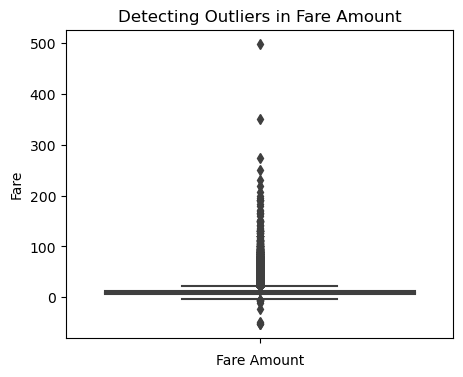

In [22]:
#Lets Find out the outliers

plt.figure(figsize=(5,4))
sns.boxplot(y = 'fare_amount', data=Fare)
plt.xlabel('Fare Amount')
plt.ylabel('Fare')
plt.title('Detecting Outliers in Fare Amount')
plt.show()

In [23]:
#Remove outliers
Q1 = Fare['fare_amount'].quantile(0.25)
Q3 = Fare['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Identify outliers
outliers = Fare[(Fare['fare_amount'] < lb) | (Fare['fare_amount'] > ub)]

# Remove outliers
Fare = Fare[(Fare['fare_amount'] >= lb) & (Fare['fare_amount'] <= ub)]

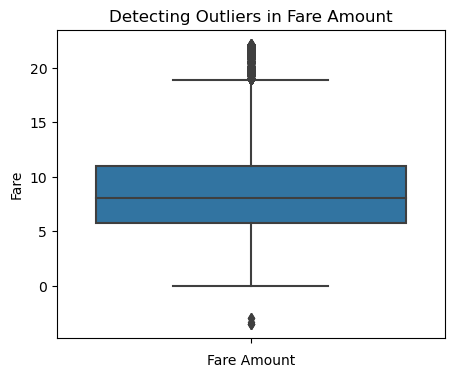

In [24]:
plt.figure(figsize=(5,4))
sns.boxplot(y = 'fare_amount', data=Fare)
plt.xlabel('Fare Amount')
plt.ylabel('Fare')
plt.title('Detecting Outliers in Fare Amount')
plt.show()

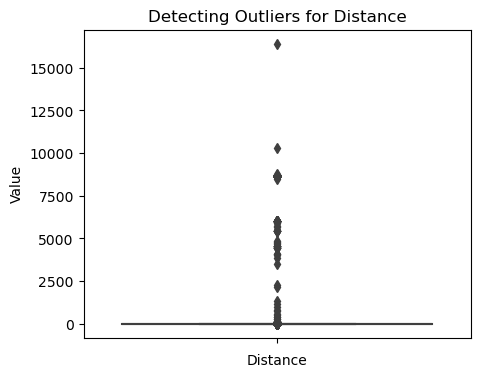

In [25]:
# checking outliers for distance
plt.figure(figsize=(5, 4))
sns.boxplot(y='distance', data=Fare)
plt.xlabel('Distance')
plt.ylabel('Value')
plt.title('Detecting Outliers for Distance')
plt.show()

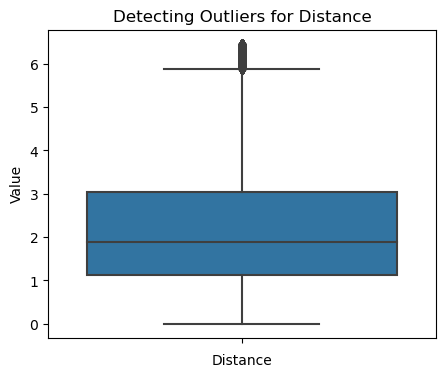

In [26]:
#Remove outliers
Q1 = Fare['distance'].quantile(0.25)
Q3 = Fare['distance'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Identify outliers
outliers = Fare[(Fare['distance'] < lb) | (Fare['distance'] > ub)]

# Remove outliers
Fare = Fare[(Fare['distance'] >= lb) & (Fare['distance'] <= ub)]

plt.figure(figsize=(5, 4))
sns.boxplot(y = 'distance', data=Fare)
plt.xlabel('Distance')
plt.ylabel('Value')
plt.title('Detecting Outliers for Distance')
plt.show()

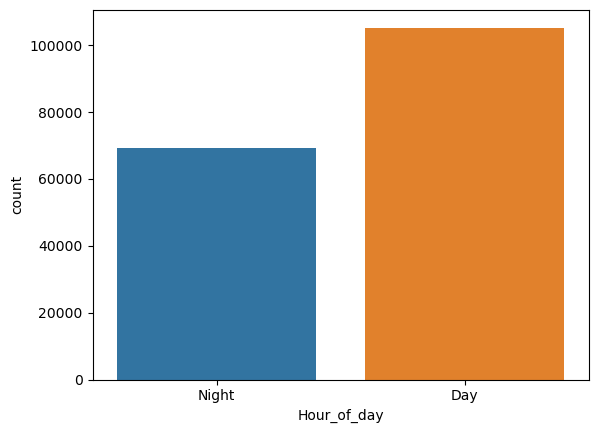

In [27]:
#Univariate analysis
#Number of rides booken according to the time of the day
sns.countplot(data = Fare,x="Hour_of_day")
plt.show()

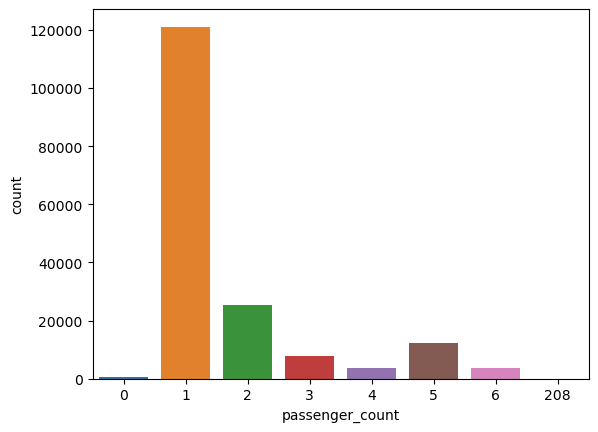

In [28]:
#Plotting the graph to check what is the number of passengers in most of the people booked rides for.
sns.countplot(data = Fare,x="passenger_count")
plt.show()

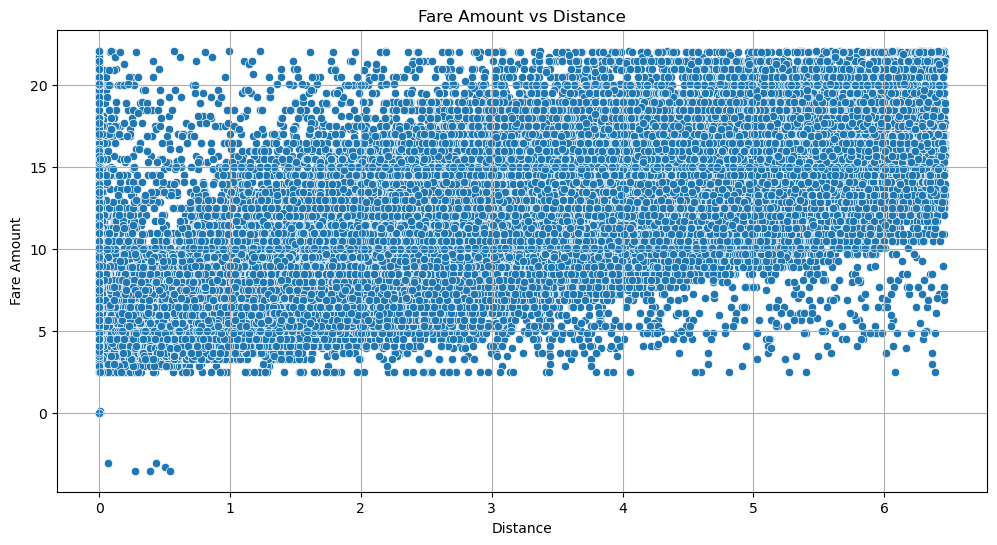

In [29]:
#Plotting the graph to check what is the number of passengers in most of the people booked rides for.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Fare, x='distance', y='fare_amount')
plt.title('Fare Amount vs Distance')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

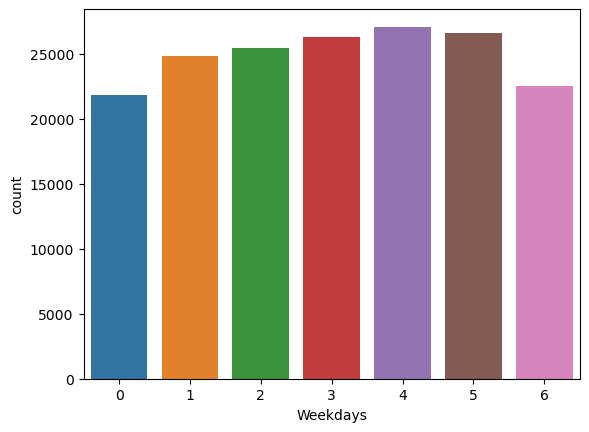

In [30]:
#Plotting the graph to check if there is a significant difference in booking of rides according to the weekday 
sns.countplot(data = Fare, x='Weekdays')
plt.show()

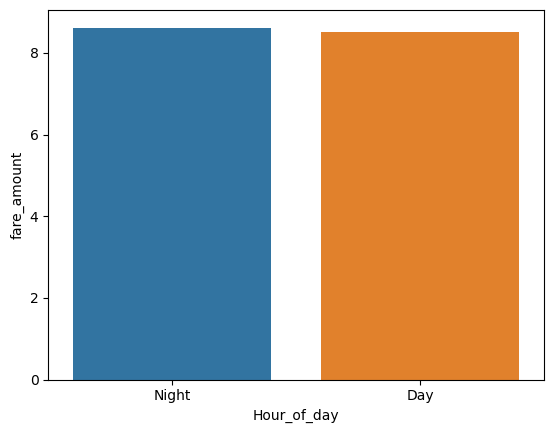

In [31]:
#Plotting the graph to check if there is a significant difference in fare amount according to the time of the day the ride is booked 
sns.barplot(x=Fare['Hour_of_day'],y=Fare['fare_amount'],ci = None)
plt.show()

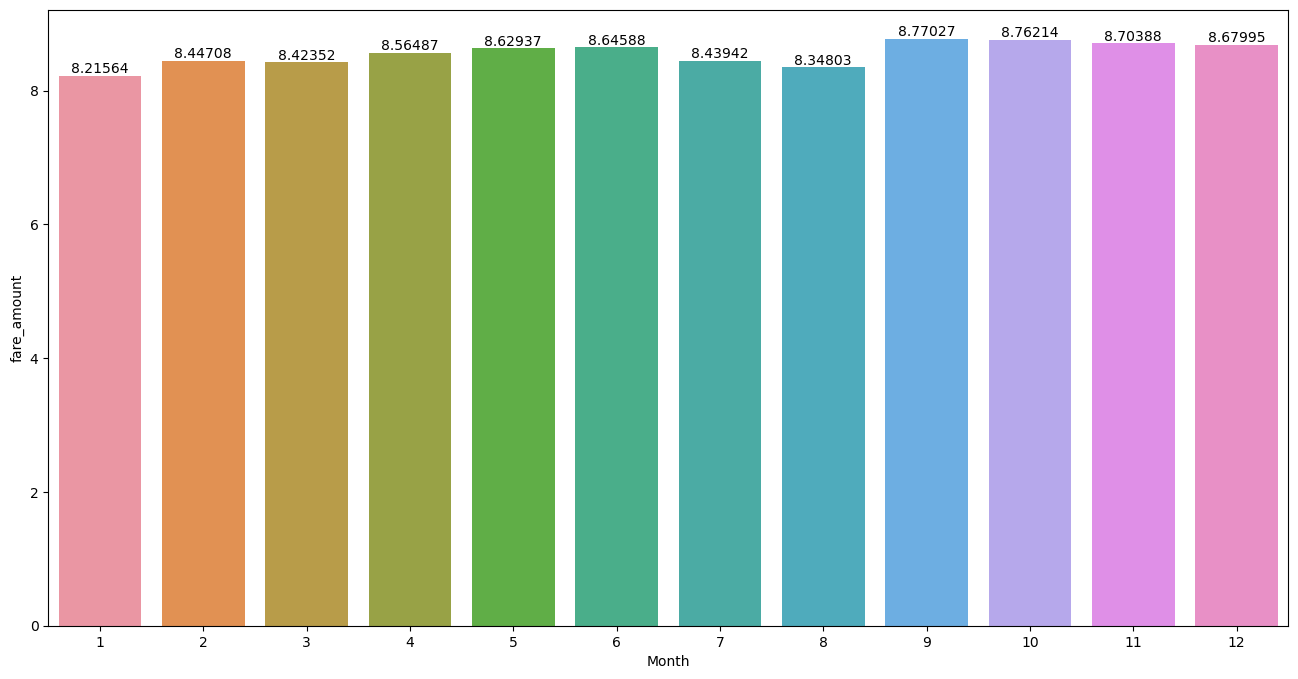

In [32]:
#Plotting the graph to check if there is a significant difference in fare amount according to the Month
plt.figure(figsize=(16,8))
figure = sns.barplot(x=Fare['Month'],y=Fare['fare_amount'],ci = None)
for contain in figure.containers :
    figure.bar_label(contain)
plt.show()

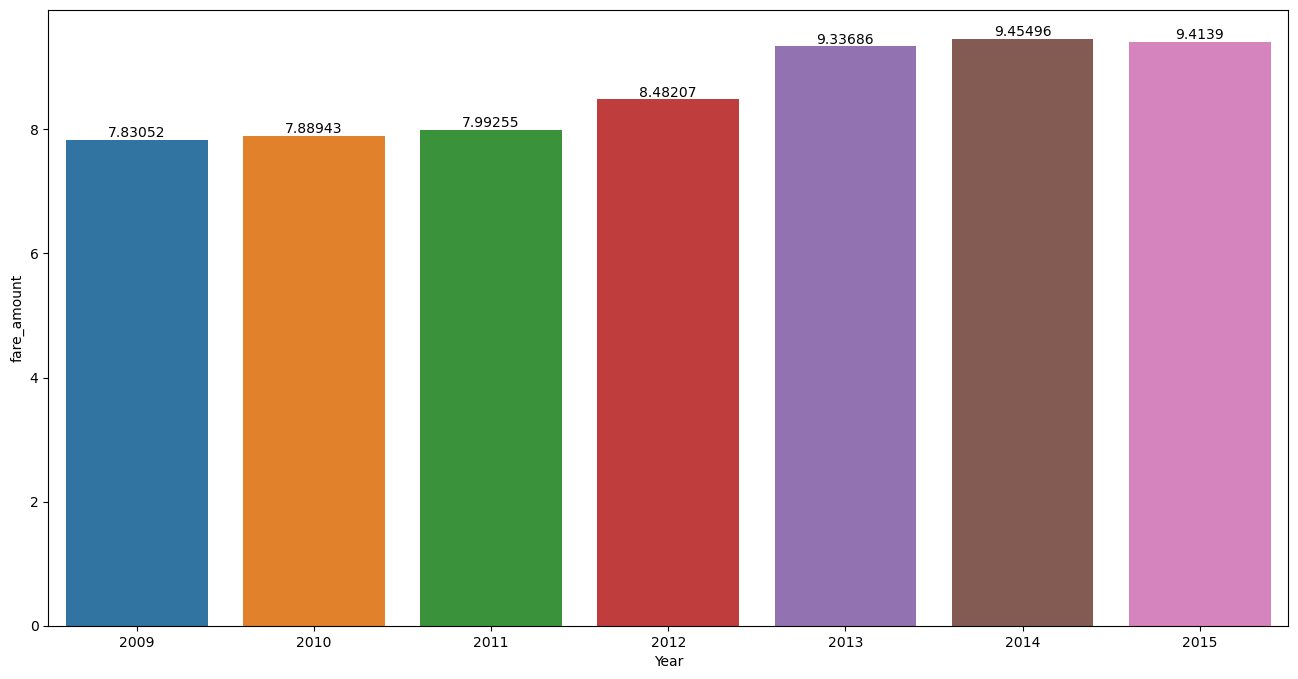

In [33]:
#Plotting the graph to check if there is a significant difference in fare amount according to the year
plt.figure(figsize=(16,8))
figure = sns.barplot(x=Fare['Year'],y=Fare['fare_amount'],ci = None)
for contain in figure.containers :
    figure.bar_label(contain)
plt.show()

1) Though the trips taken is less at night time the fare is higher than day time.
2) On weekends the count of trips are bit lesser when compared to 5 weekdays.
3) The amount is not fluctuating much monthly and there is a clear raise in the fare amount in 2013.
4) More the distance more the fare.

In [34]:
# Split the data into test and train data
x = Fare.drop('fare_amount', axis = 1)
y = Fare['fare_amount']

In [35]:
Fare[Fare.isna()]

,Date,Month,Year,Hour_of_day,Weekdays,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
24238194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27835199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44984355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25894730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17610152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3189201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42598914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16382965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20259894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Dividing the Dataset into nominal and numerica data according to the data type 
nom = Fare.select_dtypes("object").columns
num =Fare.select_dtypes("float64").columns

In [37]:
Fare.isna().sum()

Date                 0
Month                0
Year                 0
Hour_of_day          0
Weekdays             0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance             0
dtype: int64

In [38]:
corr = x.corr()

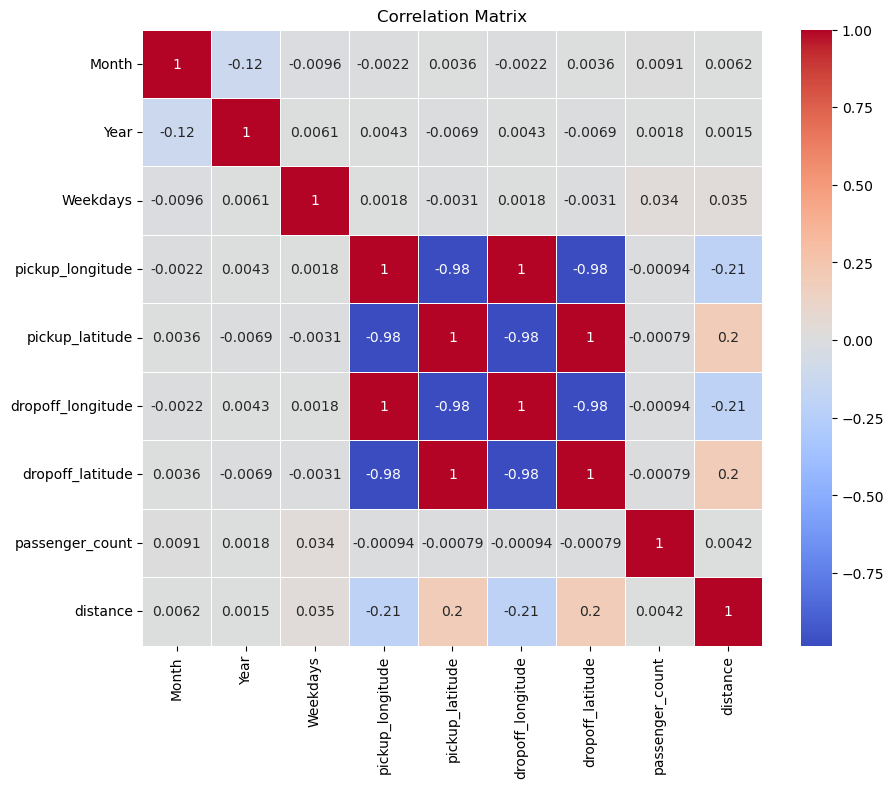

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [40]:
#getting the dummy variable so that the data will be in binary format which will be helpful for creating models
x= pd.get_dummies(x ,drop_first=True)

In [41]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

#  Linear Regression model

In [42]:
model = LinearRegression( )
model.fit(x_train ,y_train)

LinearRegression()

In [43]:
print("acc train" , r2_score(y_train ,model.predict(x_train)))
print("acc test" , r2_score(y_test ,model.predict(x_test)))

r2_lr = r2_score(y_test ,model.predict(x_test))
print("MAEtrain" , mean_absolute_error(y_train ,model.predict(x_train)))
print("MAEtest" , mean_absolute_error(y_test ,model.predict(x_test)))

mae_lr = mean_absolute_error(y_test ,model.predict(x_test))

print("MSEtrain" , mean_squared_error(y_train ,model.predict(x_train)))
print("MSEtest" , mean_squared_error(y_test ,model.predict(x_test)))

mse_lr = mean_squared_error(y_test ,model.predict(x_test))

acc train 0.66150552354835
acc test 0.636047278642959
MAEtrain 1.5300900220047478
MAEtest 1.5695866417996835
MSEtrain 4.72080749223853
MSEtest 5.028403852513389


# Decision Tree Regression model

In [44]:
dtmodel = DecisionTreeRegressor()
dtmodel.fit(x_train ,y_train)

DecisionTreeRegressor()

In [45]:
print("acc train" , r2_score(y_train ,model.predict(x_train)))
print("acc test" , r2_score(y_test ,model.predict(x_test)))

r2_dt = r2_score(y_test ,model.predict(x_test))

print("MAE train" , mean_absolute_error(y_train ,dtmodel.predict(x_train)))
print("MAE test" , mean_absolute_error(y_test ,dtmodel.predict(x_test)))

mae_dt = mean_absolute_error(y_test ,dtmodel.predict(x_test))

print("MSE train" , mean_squared_error(y_train ,dtmodel.predict(x_train)))
print("MSE test" , mean_squared_error(y_test ,dtmodel.predict(x_test)))

mse_dt = mean_squared_error(y_test ,dtmodel.predict(x_test))

acc train 0.66150552354835
acc test 0.636047278642959
MAE train 0.010347989545308224
MAE test 1.7891617012337189
MSE train 0.03914536127617083
MSE test 6.969160041898492


In [46]:
dtmodel = DecisionTreeRegressor(max_depth=20 ,min_samples_leaf = 30
                              ,min_samples_split =35)
dtmodel.fit(x_train ,y_train)


print("acc train" , r2_score(y_train ,dtmodel.predict(x_train)))
print("acc test" , r2_score(y_test ,dtmodel.predict(x_test)))

r2_dt = r2_score(y_test ,model.predict(x_test))

print("MAE train" , mean_absolute_error(y_train ,dtmodel.predict(x_train)))
print("MAE test" , mean_absolute_error(y_test ,dtmodel.predict(x_test)))

mae_dt = mean_absolute_error(y_test ,dtmodel.predict(x_test))

print("MSE train" , mean_squared_error(y_train ,dtmodel.predict(x_train)))
print("MSE test" , mean_squared_error(y_test ,dtmodel.predict(x_test)))

mse_dt = mean_squared_error(y_test ,dtmodel.predict(x_test))

acc train 0.7356512594787716
acc test 0.6575609461606426
MAE train 1.3325718996449922
MAE test 1.5111337770172355
MSE train 3.6867352398132485
MSE test 4.731169068214338


#  Ridge Regression model

In [47]:
rmodel = Ridge()
rmodel.fit(x_train ,y_train)


print("acc train" , r2_score(y_train ,rmodel.predict(x_train)))
print("acc test" , r2_score(y_test ,rmodel.predict(x_test)))

r2_r = r2_score(y_test ,rmodel.predict(x_test))

print("MAE train" , mean_absolute_error(y_train ,rmodel.predict(x_train)))
print("MAE test" , mean_absolute_error(y_test ,rmodel.predict(x_test)))

mae_r = mean_absolute_error(y_test ,rmodel.predict(x_test))

print("MSE train" , mean_squared_error(y_train ,rmodel.predict(x_train)))
print("MSE test" , mean_squared_error(y_test ,rmodel.predict(x_test)))

mse_r = mean_squared_error(y_test ,rmodel.predict(x_test))

acc train 0.661487627648117
acc test 0.6362775677765302
MAE train 1.5297822590789205
MAE test 1.5687971941061962
MSE train 4.7210570771085285
MSE test 5.025222156929073


# Random Forest Regression model

In [48]:
rfmodel = RandomForestRegressor(n_estimators=5,max_depth=20 ,min_samples_leaf = 40
                              ,min_samples_split =30)
rfmodel.fit(x_train ,y_train)


print("acc train" , r2_score(y_train ,rfmodel.predict(x_train)))
print("acc test" , r2_score(y_test ,rfmodel.predict(x_test)))

r2_rf = r2_score(y_test ,rfmodel.predict(x_test))

print("MAE train" , mean_absolute_error(y_train ,rfmodel.predict(x_train)))
print("MAE test" , mean_absolute_error(y_test ,rfmodel.predict(x_test)))

mae_rf = mean_absolute_error(y_test ,rfmodel.predict(x_test))

print("MSE train" , mean_squared_error(y_train ,rfmodel.predict(x_train)))
print("MSE test" , mean_squared_error(y_test ,rfmodel.predict(x_test)))

mse_rf = mean_squared_error(y_test ,rfmodel.predict(x_test))

acc train 0.7238249783320287
acc test 0.679463163344146
MAE train 1.3568555750582543
MAE test 1.4511508750927462
MSE train 3.851670269856015
MSE test 4.428566046444179


In [49]:
model_mae = {
    'Linear Regression' : mae_lr,
    'Decision tree Regression' : mae_dt,
    'Ridge Regression' : mae_r,
    'Random Forest Regression' : mae_rf,
}

model_mse = {
    'Linear Regression' : mse_lr,
    'Decision tree Regression' : mse_dt,
    'Ridge Regression'  : mse_r,
    'Random Forest Regression' : mse_rf,
}

model_r2 = {
     'Linear Regression' : r2_lr,
    'Decision tree Regression' : r2_dt,
    'Ridge Regression'  : r2_r,
    'Random Forest Regression' : r2_rf,
}

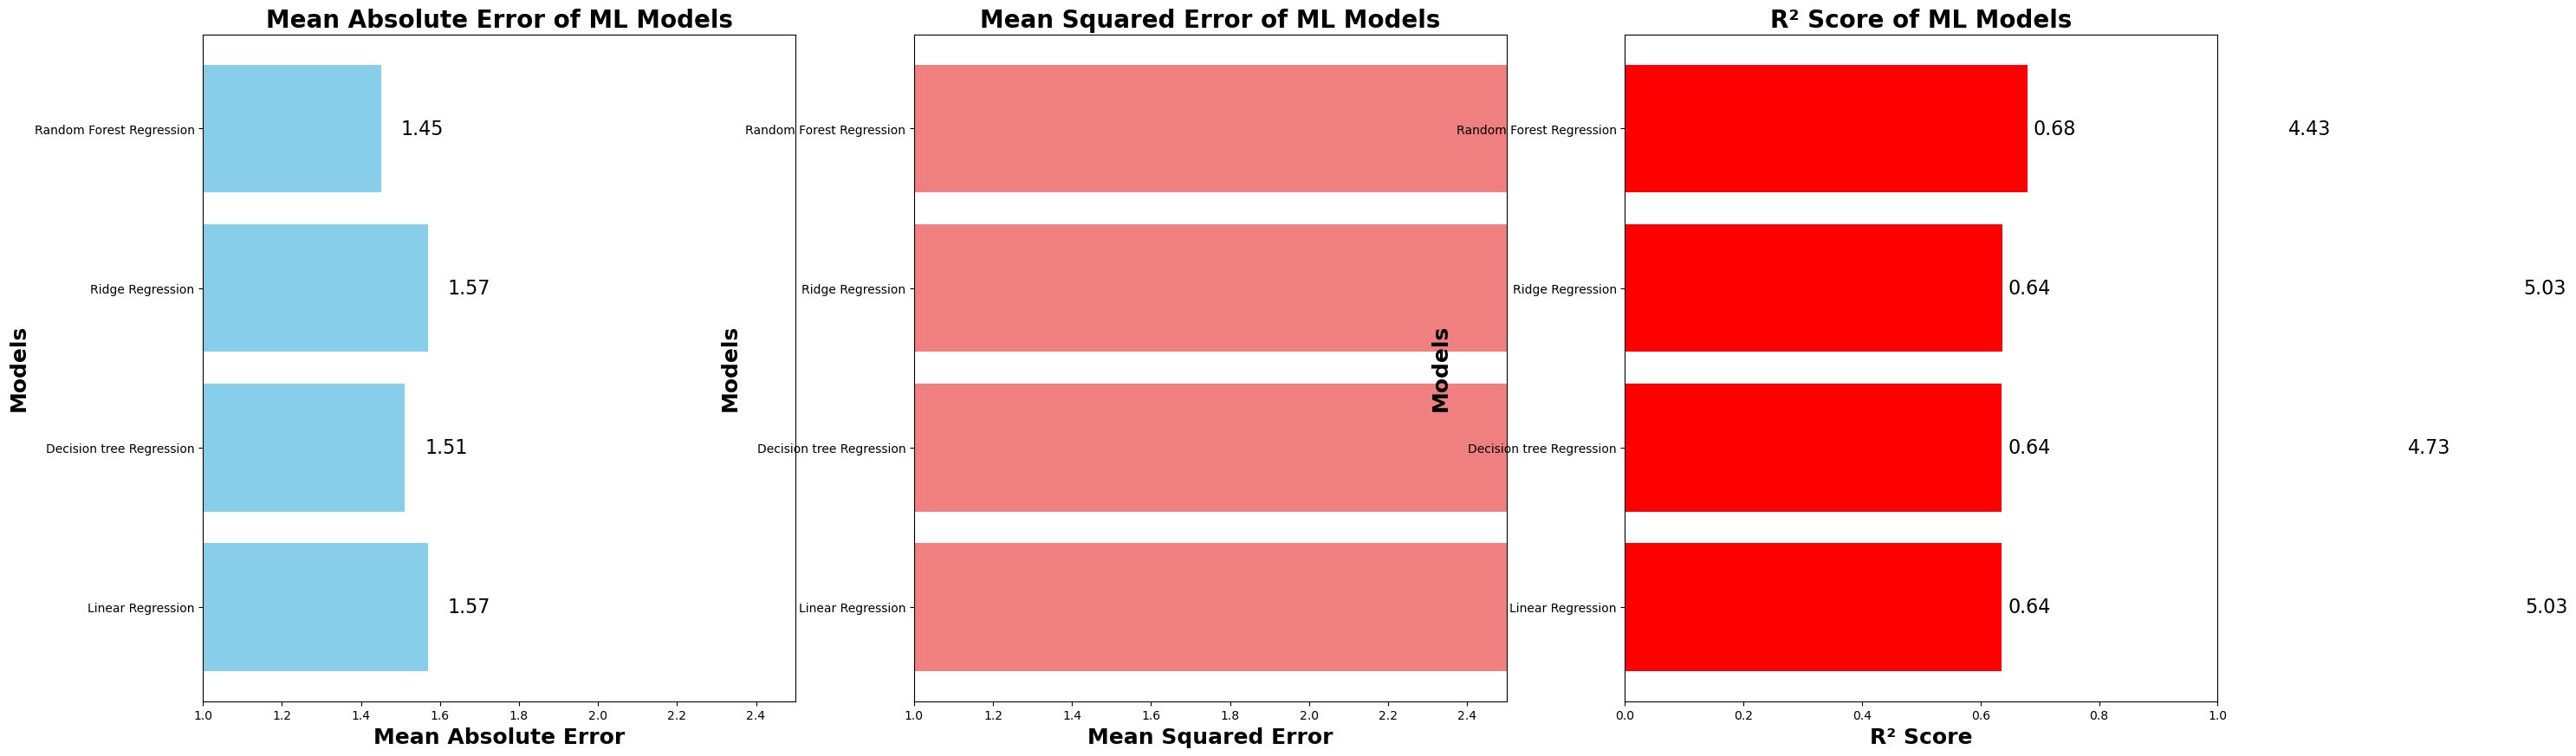

In [53]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))  # Increased figsize for larger plots

# Plot MAE
bars_mae = ax1.barh(list(model_mae.keys()), list(model_mae.values()), color='skyblue')
ax1.set_ylabel('Models', fontweight='bold', fontsize=18)
ax1.set_xlabel('Mean Absolute Error', fontweight='bold', fontsize=18)
ax1.set_title('Mean Absolute Error of ML Models', fontweight='bold', fontsize=20)
ax1.set_xlim(1.0, 2.5)  # Adjusted xlim for better visibility
for bar in bars_mae:
    width = bar.get_width()
    ax1.text(width + 0.05, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(round(width, 2)), ha='left', va='center', fontsize=16)

# Plot MSE
bars_mse = ax2.barh(list(model_mse.keys()), list(model_mse.values()), color='lightcoral')
ax2.set_ylabel('Models', fontweight='bold', fontsize=18)
ax2.set_xlabel('Mean Squared Error', fontweight='bold', fontsize=18)  # Corrected label to Mean Squared Error
ax2.set_title('Mean Squared Error of ML Models', fontweight='bold', fontsize=20)  # Corrected title to Mean Squared Error
ax2.set_xlim(1.0, 2.5)  # Adjusted xlim for better visibility
for bar in bars_mse:
    width = bar.get_width()
    ax2.text(width + 0.05, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(round(width, 2)), ha='left', va='center', fontsize=16)

# Plot R2
bars_r2 = ax3.barh(list(model_r2.keys()), list(model_r2.values()), color='red')
ax3.set_ylabel('Models', fontweight='bold', fontsize=18)
ax3.set_xlabel('R² Score', fontweight='bold', fontsize=18)  # Corrected label to R² Score
ax3.set_title('R² Score of ML Models', fontweight='bold', fontsize=20)  # Corrected title to R² Score
ax3.set_xlim(0.0, 1.0)  # Adjusted xlim for R² Score
for bar in bars_r2:
    width = bar.get_width()
    ax3.text(width + 0.01, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(round(width, 2)), ha='left', va='center', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()


We will go with Random forest regression model

In [54]:
# Calculate feature importance
feature_importances = rfmodel.feature_importances_
features = x.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print (feature_importance_df)
# Plot feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.title('Feature Importance')
# plt.show()

                Feature  Importance
8              distance    0.844523
1                  Year    0.061135
6      dropoff_latitude    0.026883
3      pickup_longitude    0.019790
5     dropoff_longitude    0.011015
...                 ...         ...
798     Date_2011-03-02    0.000000
799     Date_2011-03-03    0.000000
800     Date_2011-03-04    0.000000
801     Date_2011-03-05    0.000000
1190    Date_2012-03-28    0.000000

[2381 rows x 2 columns]


The important features are :
1) Distance
2) Year
3) dropoff_latitude

In [55]:
# predicting total fare
y_pred = rfmodel.predict(x_test)

max_fare = y_pred + 1.57
min_fare = y_pred - 1.57

# creating a dataframe with Actual Fare, Total Fare (↓), and Total Fare (↑)
df_combined = pd.DataFrame({
    'Actual Fare': y_test,
    'Predicted Fare': y_pred,
    'Max Fare': max_fare,
    'Min Fare': min_fare,
})

# rounding to 2 decimal places
df_combined['Predicted Fare'] = ((100 * df_combined['Predicted Fare'].round(2)).astype(int)) / 100
df_combined['Max Fare'] = ((100 * df_combined['Max Fare'].round(2)).astype(int)) / 100
df_combined['Min Fare'] = ((100 * df_combined['Min Fare'].round(2)).astype(int)) / 100

# displaying the first 10 rows
df_combined.head(10)

,Actual Fare,Predicted Fare,Max Fare,Min Fare
11045069,6.1,7.73,9.30,6.16
14203987,8.0,13.98,15.55,12.41
49935091,4.9,5.87,7.44,4.30
22603561,9.0,8.17,9.74,6.60
19945174,10.9,8.35,9.92,6.78
20448060,4.5,5.47,7.04,3.90
40028967,5.3,5.52,7.09,3.95
24527719,9.7,10.50,12.07,8.93
55387814,11.5,7.24,8.81,5.67
6599786,4.1,5.35,6.92,3.78


We have observed that our model provides reliable fare predictions, even without traffic and weather data. Notably, the maximum and minimum fare values derived from our predictions are practical and valuable metrics for real-world applications.